# Segmentación de Clientes basada en Datos de Tarjeta de Crédito

En este caso de uso, el objetivo es realizar la segmentación de clientes utilizando datos relacionados con tarjetas de crédito. A continuación se presenta el diccionario de datos correspondiente al conjunto de datos de tarjetas de crédito:




• CUST_ID: Identificación del titular de la tarjeta de crédito (categórica)

• BALANCE: el monto del saldo queda en su cuenta para realizar compras

• PURCHASES: Cantidad de compras hechas de una cuenta

• INSTALLMENTS_PURCHASES: cantidad de compra realizada en cuotas

• CASH_ADVANCE: efectivo por adelantado dado por el usuario

• CREDIT_LIMIT: límite de tarjeta de crédito para el usuario

• PAYMENTS: Cantidad de pago realizado por USUS

• MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por un usuario

• TENURE: tenencia del servicio de tarjetas de crédito para el usuario

## Carga de datos

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Análisis Exploratorio de Datos y Preprocesamiento

In [16]:
dataset = pd.read_csv('../Datasets/credit_card.csv')
dataset.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,C10004,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,C10005,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


In [17]:
dataset.describe(include='all')

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,1003.204834,411.067645,978.871112,4494.282473,1733.143852,844.906767,11.517318
std,NaN,2081.531879,2136.634782,904.338115,2097.163877,3638.646702,2895.063757,2332.792322,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,6.000000
25%,NaN,128.281915,39.635000,0.000000,0.000000,1600.000000,383.276166,170.857654,12.000000
50%,NaN,873.385231,361.280000,89.000000,0.000000,3000.000000,856.901546,312.343947,12.000000
75%,NaN,2054.140036,1110.130000,468.637500,1113.821139,6500.000000,1901.134317,788.713501,12.000000


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_ID                 8950 non-null   object 
 1   BALANCE                 8950 non-null   float64
 2   PURCHASES               8950 non-null   float64
 3   INSTALLMENTS_PURCHASES  8950 non-null   float64
 4   CASH_ADVANCE            8950 non-null   float64
 5   CREDIT_LIMIT            8950 non-null   float64
 6   PAYMENTS                8950 non-null   float64
 7   MINIMUM_PAYMENTS        8950 non-null   float64
 8   TENURE                  8950 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 629.4+ KB


In [19]:
# Ahora reviso si hay datos NA
dataset.isna().sum()

CUST_ID                   0
BALANCE                   0
PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
TENURE                    0
dtype: int64

In [22]:
# Nos deshacemos del custom id porque no sirve para nuestro modelo
dataset = dataset.drop('CUST_ID', axis=1)
dataset.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


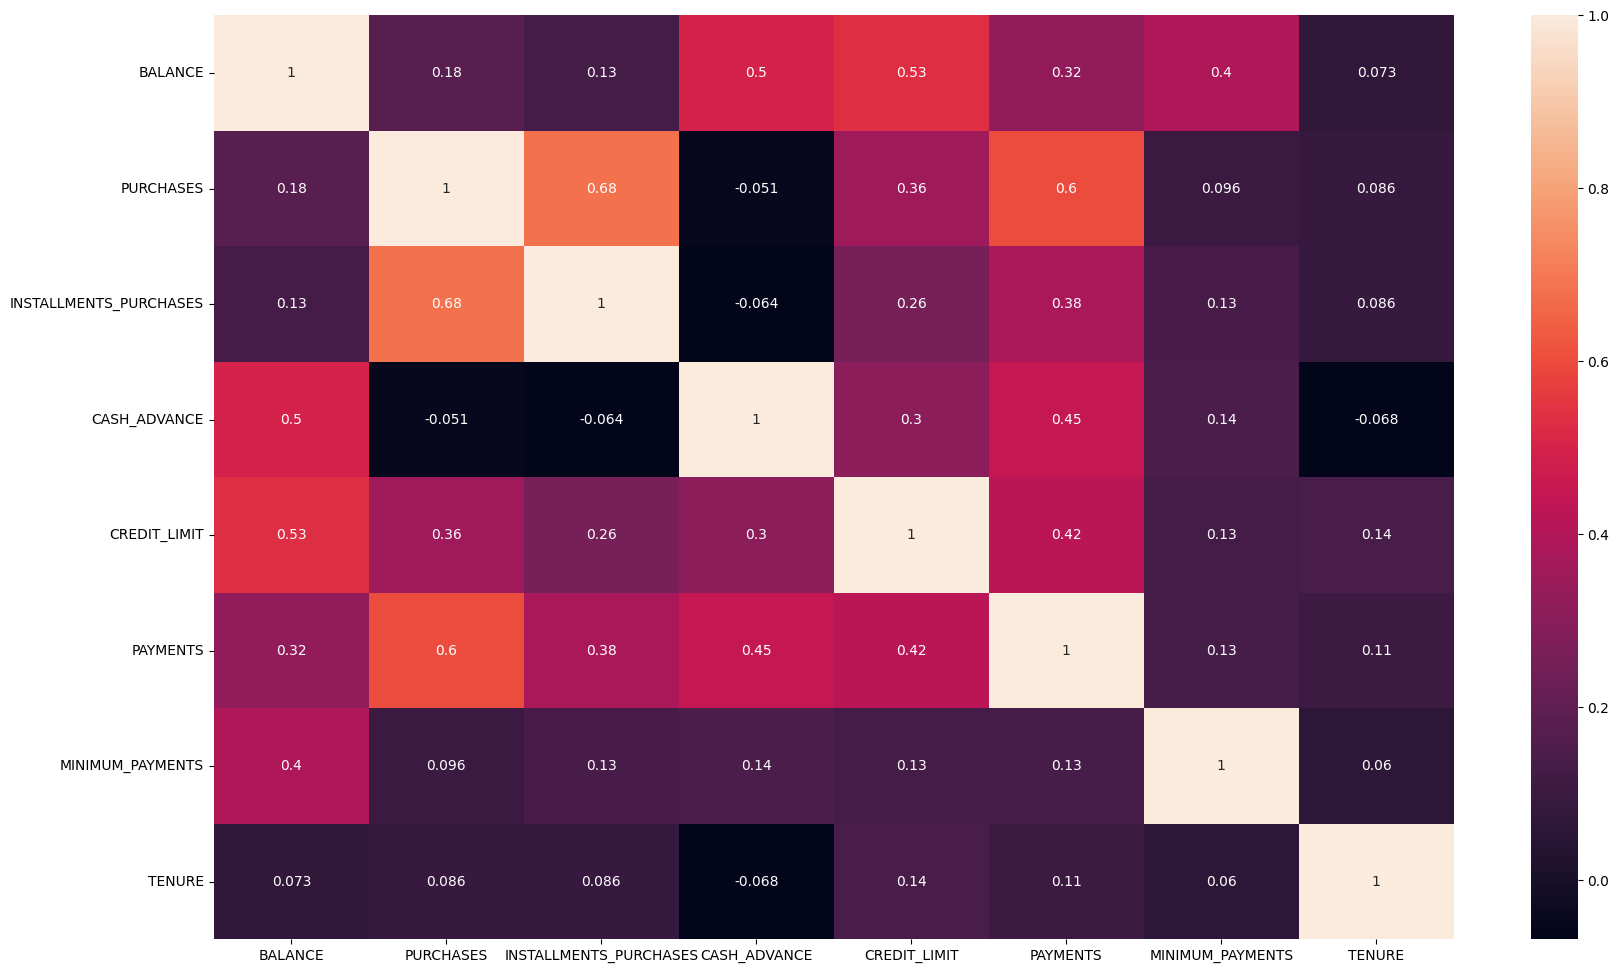

In [23]:
plt.subplots(figsize = (20,12))
sns.heatmap(dataset.corr(),annot = True)
plt.show()

Elegimos inicialmente  dos características para presentar una grafica y comenzaremos con 3 cluters, Posteriormente buscaremos si hay un mejor número de cluster usando el método del codo.

Eligo las variables BALANCE y PURCHASES porque entiendo que una persona con gran BALANCE significa que tiene posibilidad de gastar dinero, mientras que PURCHASES refleja sus compras reales. Podriamos obtener algun segmento de clientes que coincidan entre tener buen dinero, el cual gastan en ciertos productos. 

In [26]:
selected_columns = ['BALANCE', 'PURCHASES']
dataset[selected_columns]

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
3,1666.670542,1499.00
4,817.714335,16.00
...,...,...
8945,28.493517,291.12
8946,19.183215,300.00
8947,23.398673,144.40
8948,13.457564,0.00


In [43]:
ss = StandardScaler()
X = ss.fit_transform(dataset[selected_columns])

pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters = 3, n_init='auto')
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

In [28]:
silhouette_score(dataset[selected_columns], kmeans.labels_)

0.6280962051193139

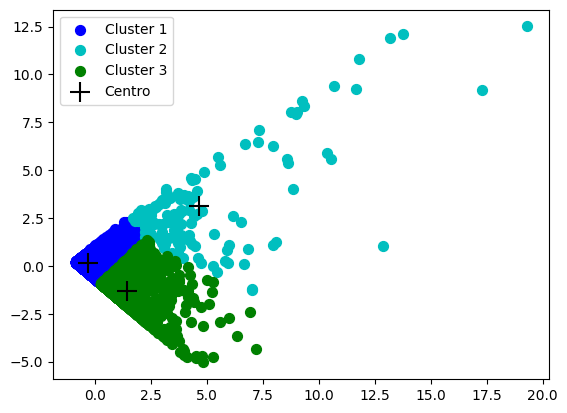

In [36]:
cores = ['b', 'c', 'g']
for i in range(len(cores)):
    plt.scatter(X_pca[pred == i, 0], X_pca[pred == i, 1], s = 50, c = cores[i], label = 'Cluster ' + str(i + 1))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, marker = '+', c = 'black', label = 'Centro')
plt.legend()
plt.show()

Puede que los dos primeros clusters(azul y celeste) representen el grupo de clientes que nos interesa porque sus centros estan muy cercanos , es decir tienen  características similares en términos de BALANCE y PURCHASES. 

Hay un tercer cluster, el cual no estan tan cerca a los dos primeros, y parece que tiene varios valores atipicos. Esto puede indicar que hay usuarios con caracteristicas muy diferentes a los primeros clusters, y que se puede formar un cuarto cluster.

Ahora buscamos el número ideal de clusters para el algoritmo k-means.

In [42]:
inertia = [] #lista vacía para valores de inercia
for k in range(2,11): #para valores de k de 2 a 10
  kmeans = KMeans(n_clusters=k, n_init='auto') #calcular kmeans con k clusters
  kmeans.fit(dataset[selected_columns]) #aplicar kmeans al dataframe
  inertia.append(kmeans.inertia_) #la propiedad inertia_ de kmeans devuelve el valor de inercia obtenido
inertia

[51275809064.20938,
 33728906755.61581,
 24593985804.696064,
 19253601988.05209,
 15346716162.161463,
 12895355924.324247,
 11841678840.782644,
 10351549722.052721,
 9193397162.984783]

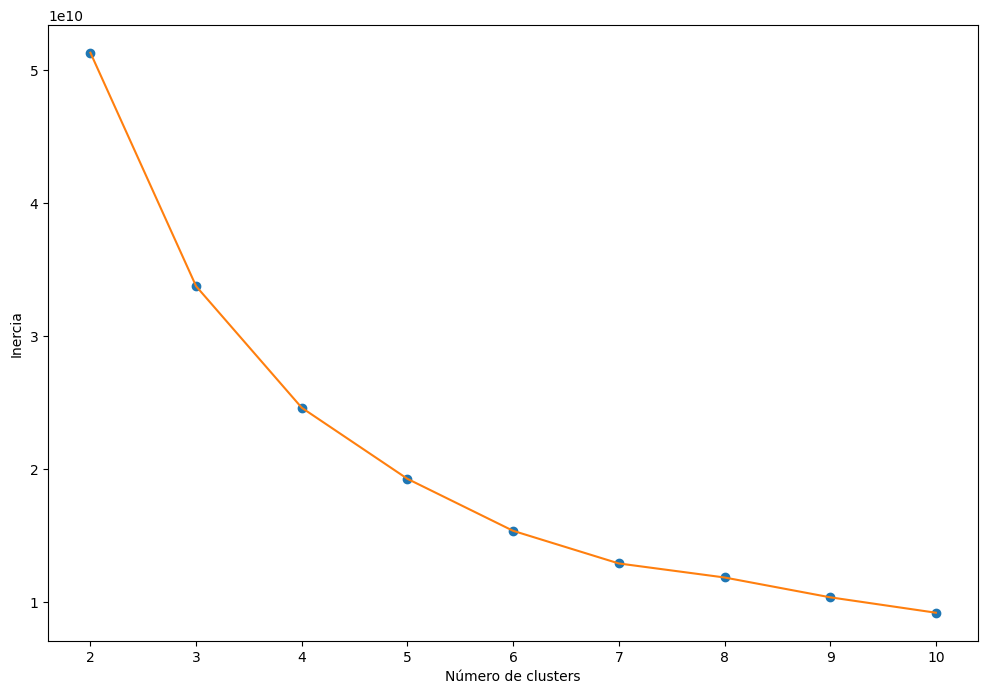

In [44]:
plt.figure(figsize=(12,8))
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.plot(np.arange(2,11), inertia, 'o') #plotear puntos según valor de inercia
plt.plot(np.arange(2,11), inertia, '-') #plotear una línea de inercia
plt.show()

In [54]:
def cambio(i,j):
  return (inertia[i-2] - inertia[j-2]) / (j - i)

for k in range(2,9):
  print('El cambio de k={} a k={} es {}, el cambio de k={} a k={} es {}, el ratio entre ambos es {}\n'.format(k,k+1,cambio(k,k+1),k+1,k+2,cambio(k+1,k+2),(cambio(k,k+1)/cambio(k+1,k+2))))

El cambio de k=2 a k=3 es 42115250240.994934, el cambio de k=3 a k=4 es 25108856558.66571, el ratio entre ambos es 1.6773065767688207

El cambio de k=3 a k=4 es 25108856558.66571, el cambio de k=4 a k=5 es 15368293629.73175, el ratio entre ambos es 1.6338090072725906

El cambio de k=4 a k=5 es 15368293629.73175, el cambio de k=5 a k=6 es 25442190654.28943, el ratio entre ambos es 0.6040475774494966

El cambio de k=5 a k=6 es 25442190654.28943, el cambio de k=6 a k=7 es 12725715121.15512, el ratio entre ambos es 1.9992739435125768

El cambio de k=6 a k=7 es 12725715121.15512, el cambio de k=7 a k=8 es 12084294670.826508, el ratio entre ambos es 1.0530788488530578

El cambio de k=7 a k=8 es 12084294670.826508, el cambio de k=8 a k=9 es 2483539178.8710175, el ratio entre ambos es 4.865755601375236

El cambio de k=8 a k=9 es 2483539178.8710175, el cambio de k=9 a k=10 es 9702823522.124786, el ratio entre ambos es 0.2559604607058911



#### El numero ideal de clusters es 2

In [46]:
kmeans = KMeans(n_clusters = 2, n_init='auto')
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

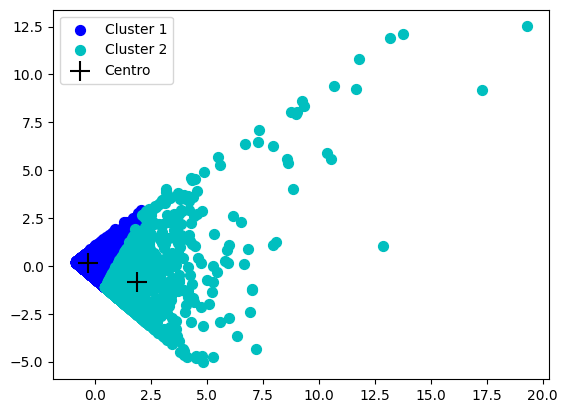

In [47]:
cores = ['b', 'c']
for i in range(len(cores)):
    plt.scatter(X_pca[pred == i, 0], X_pca[pred == i, 1], s = 50, c = cores[i], label = 'Cluster ' + str(i + 1))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, marker = '+', c = 'black', label = 'Centro')
plt.legend()
plt.show()

A primera vista, siguen llamando la atención los valores atipicos del segundo cluster, estos pueden indicar la presencia de características diferentes a las del resto del mismo cluster, es decir este cluster tiene gente con otras caracteristicas las cuales puede valer la pena estudiar.

Ahora probaremos usando todas las características.

In [50]:
inertia = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(dataset)
  inertia.append(kmeans.inertia_)
print(inertia)

[256813733077.45767, 214698482836.46274, 189589626277.79703, 174221332648.06528, 148779141993.77585, 136053426872.62073, 123969132201.79422, 121485593022.9232, 111782769500.79842]


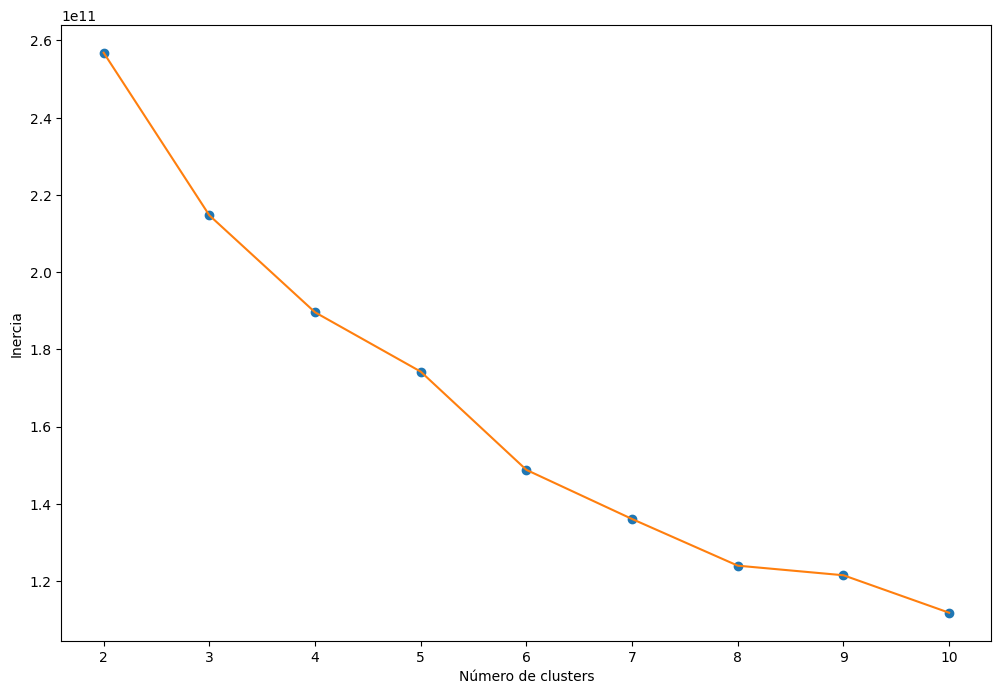

In [51]:
plt.figure(figsize=(12,8))
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.plot(np.arange(2,11), inertia, 'o')
plt.plot(np.arange(2,11), inertia, '-')
plt.show()

In [53]:
def cambio(i,j):
  return (inertia[i-2] - inertia[j-2]) / (j - i)

for k in range(2,9):
  print('El cambio de k={} a k={} es {}, el cambio de k={} a k={} es {}, el ratio entre ambos es {}\n'.format(k,k+1,cambio(k,k+1),k+1,k+2,cambio(k+1,k+2),(cambio(k,k+1)/cambio(k+1,k+2))))

El cambio de k=2 a k=3 es 42115250240.994934, el cambio de k=3 a k=4 es 25108856558.66571, el ratio entre ambos es 1.6773065767688207

El cambio de k=3 a k=4 es 25108856558.66571, el cambio de k=4 a k=5 es 15368293629.73175, el ratio entre ambos es 1.6338090072725906

El cambio de k=4 a k=5 es 15368293629.73175, el cambio de k=5 a k=6 es 25442190654.28943, el ratio entre ambos es 0.6040475774494966

El cambio de k=5 a k=6 es 25442190654.28943, el cambio de k=6 a k=7 es 12725715121.15512, el ratio entre ambos es 1.9992739435125768

El cambio de k=6 a k=7 es 12725715121.15512, el cambio de k=7 a k=8 es 12084294670.826508, el ratio entre ambos es 1.0530788488530578

El cambio de k=7 a k=8 es 12084294670.826508, el cambio de k=8 a k=9 es 2483539178.8710175, el ratio entre ambos es 4.865755601375236

El cambio de k=8 a k=9 es 2483539178.8710175, el cambio de k=9 a k=10 es 9702823522.124786, el ratio entre ambos es 0.2559604607058911



El mejor K es 2

In [55]:
X = ss.fit_transform(dataset)

pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters = 2, n_init='auto')
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

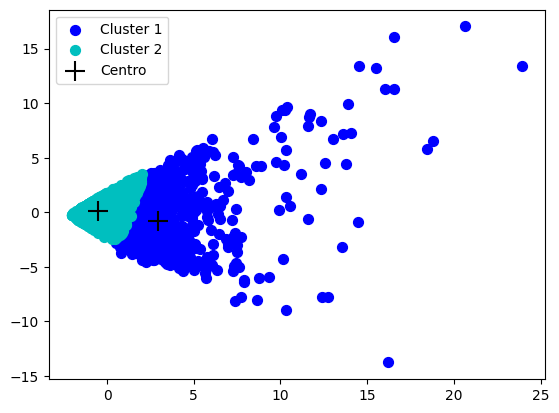

In [56]:
cores = ['b', 'c']
for i in range(len(cores)):
    plt.scatter(X_pca[pred == i, 0], X_pca[pred == i, 1], s = 50, c = cores[i], label = 'Cluster ' + str(i + 1))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, marker = '+', c = 'black', label = 'Centro')
plt.legend()
plt.show()

#### Al usar todas las caracteristicas, parece que el primer cluster tiene los puntos más cerca a su centro. Esto puede significar que el algoritmo de clustering ha sido efectivo en identificar patrones y grupos.